Phase 1: Data Intelligence Foundation :-

In [1]:
#Installing Required Libraries

!pip install pandas numpy seaborn matplotlib openai langchain --quiet

In [2]:
# Load the Dataset

import pandas as pd

# Upload CSV via Colab file uploader
from google.colab import files
uploaded = files.upload()

# Load dataset
import io
df = pd.read_csv(io.BytesIO(uploaded[list(uploaded.keys())[0]]))

df.head()

Saving crop_yield.csv to crop_yield (1).csv


,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [3]:
# Basic Dataset Overview

print("Dataset Shape:", df.shape)
print("\nColumn Names:\n", df.columns.tolist())
df.info()

Dataset Shape: (6439, 10)

Column Names:
 ['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6439 entries, 0 to 6438
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             6439 non-null   object 
 1   Crop_Year        6439 non-null   int64  
 2   Season           6439 non-null   object 
 3   State            6439 non-null   object 
 4   Area             6439 non-null   float64
 5   Production       6439 non-null   int64  
 6   Annual_Rainfall  6439 non-null   float64
 7   Fertilizer       6439 non-null   float64
 8   Pesticide        6439 non-null   float64
 9   Yield            6439 non-null   float64
dtypes: float64(5), int64(2), object(3)
memory usage: 503.2+ KB


In [4]:
# Statistical Summary

df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Crop,6439,55,Rice,422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Crop_Year,6439.0,NaN,NaN,NaN,2008.582699,6.853227,1997.0,2003.0,2009.0,2015.0,2019.0
Season,6439,6,Kharif,2214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,6439,17,Karnataka,1320,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Area,6439.0,NaN,NaN,NaN,136213.651467,734928.027097,1.0,1924.5,12763.0,83754.0,50808100.0
Production,6439.0,NaN,NaN,NaN,47018579.659574,457011302.610029,0.0,2200.0,20400.0,152777.0,6326000000.0
Annual_Rainfall,6439.0,NaN,NaN,NaN,1748.951823,1060.435973,315.9,1002.9,1332.5,2167.5,6552.7
Fertilizer,6439.0,NaN,NaN,NaN,17204062.586795,75437917.744731,98.17,259443.6,1677470.85,10666059.5,4835406877.0
Pesticide,6439.0,NaN,NaN,NaN,36989.581301,222228.831475,0.09,501.41,3277.0,22130.535,15750511.0
Yield,6439.0,NaN,NaN,NaN,190.25307,1331.984057,0.0,0.605,1.229444,3.261209,16935.05846


In [6]:
# Missing Value Detection

missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing %': missing_percent.round(2)
})
missing_summary[missing_summary['Missing Values'] > 0]

,Missing Values,Missing %


In [7]:
# Intelligent Column Typing

df.dtypes  # Check datatypes

,0
Crop,object
Crop_Year,int64
Season,object
State,object
Area,float64
Production,int64
Annual_Rainfall,float64
Fertilizer,float64
Pesticide,float64
Yield,float64


In [8]:
# Outlier Detection (Z-score)

from scipy.stats import zscore

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
z_scores = df[numeric_cols].apply(zscore)
outliers = (abs(z_scores) > 3).sum()
outliers[outliers > 0]

,0
Area,32
Production,66
Annual_Rainfall,107
Fertilizer,61
Pesticide,27
Yield,132


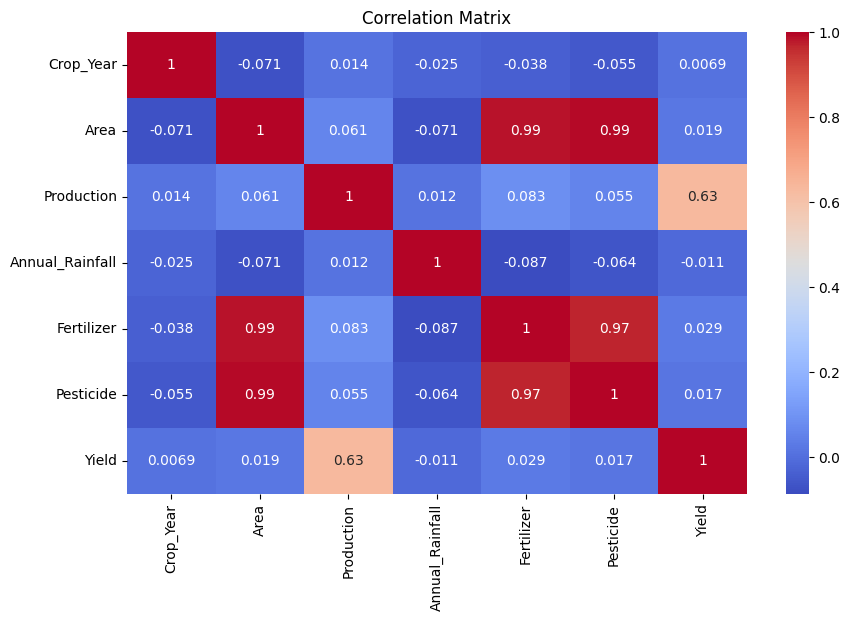

In [9]:
# Correlation Analysis

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [14]:
# Smart Pattern Discovery (Top Yield Crops by State)

top_yield = df.groupby(['State', 'Crop'])['Yield'].mean().reset_index()
top_yield = top_yield.sort_values(by='Yield', ascending=False).head(10)
top_yield


,State,Crop,Yield
440,West Bengal,Coconut,12646.748283
7,Andhra Pradesh,Coconut,11805.109108
374,Tamil Nadu,Coconut,11207.504971
326,Puducherry,Coconut,11131.797500
50,Assam,Coconut,7185.238140
162,Karnataka,Coconut,6848.325059
205,Kerala,Coconut,6270.147795
117,Goa,Coconut,5069.028077
255,Maharashtra,Maize,248.459184
344,Puducherry,Sugarcane,104.332500


In [11]:
# Context-Aware Feature Engineering (Yield per Area & Production Ratio)

df['Yield_per_Hectare'] = df['Production'] / df['Area']
df['Fertilizer_per_Area'] = df['Fertilizer'] / df['Area']
df[['Yield_per_Hectare', 'Fertilizer_per_Area']].describe()


,Yield_per_Hectare,Fertilizer_per_Area
count,6439.000000,6439.000000
mean,200.228250,135.267125
std,1407.931325,26.901338
min,0.000000,94.670000
25%,0.603519,102.130000
50%,1.208937,144.490000
75%,3.389250,157.440000
max,18381.996982,171.760000


In [16]:
#Natural Language Summary Using OpenAI (Optional API Required)
import getpass
from openai import OpenAI

api_key = getpass.getpass("Enter your OpenAI API key: ")
client = OpenAI(api_key=api_key)



Enter your OpenAI API key: ··········


In [18]:
# Conversational Insight Example (Column Analysis)
for col in df.columns:
    print(f"\n {col} Insight:")
    print("Unique values:", df[col].nunique())
    print("Top 5 frequent:\n", df[col].value_counts().head())



 Crop Insight:
Unique values: 55
Top 5 frequent:
 Crop
Rice         422
Groundnut    232
Maize        214
Sesamum      211
Ragi         207
Name: count, dtype: int64

 Crop_Year Insight:
Unique values: 23
Top 5 frequent:
 Crop_Year
1997    352
2019    348
2017    347
2018    345
2016    336
Name: count, dtype: int64

 Season Insight:
Unique values: 6
Top 5 frequent:
 Season
Kharif        2214
Whole Year    1867
Rabi          1751
Summer         419
Winter          96
Name: count, dtype: int64

 State Insight:
Unique values: 17
Top 5 frequent:
 State
Karnataka         1320
Andhra Pradesh    1140
Assam              704
Tamil Nadu         679
Meghalaya          607
Name: count, dtype: int64

 Area Insight:
Unique values: 5533
Top 5 frequent:
 Area
1.0    68
3.0    33
2.0    28
4.0    21
5.0    20
Name: count, dtype: int64

 Production Insight:
Unique values: 5580
Top 5 frequent:
 Production
0     48
1     37
3     25
2     24
10    17
Name: count, dtype: int64

 Annual_Rainfall Insight:


Conversational Analytics Engine :-

In [19]:
!pip install pandas langchain openai duckdb sqlalchemy tabulate --quiet

In [20]:
#Load Dataset

import pandas as pd
from google.colab import files
import io

uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded[list(uploaded.keys())[0]]))
df.head()


Saving crop_yield.csv to crop_yield (2).csv


,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [21]:
#Question-Answering System:

#View All Columns for Reference

df.columns.tolist()

['Crop',
 'Crop_Year',
 'Season',
 'State',
 'Area',
 'Production',
 'Annual_Rainfall',
 'Fertilizer',
 'Pesticide',
 'Yield']

In [22]:
#Setup Natural Language Query Interface

import duckdb
con = duckdb.connect(database=':memory:')
con.register('data', df)

In [23]:
#Simple Natural Language Query to SQL Mapping

# Example: Get average yield by crop
query = "SELECT Crop, AVG(Yield) AS avg_yield FROM data GROUP BY Crop ORDER BY avg_yield DESC LIMIT 5"
con.execute(query).fetchdf()

,Crop,avg_yield
0,Coconut,8637.148834
1,Sugarcane,64.021699
2,Banana,20.905693
3,Tapioca,17.371235
4,Onion,13.831851


In [24]:
#Ask Follow-Up — Yield per Area per State

query = """
SELECT State, AVG(Production / Area) AS avg_yield_per_hectare
FROM data
GROUP BY State
ORDER BY avg_yield_per_hectare DESC
LIMIT 10
"""
con.execute(query).fetchdf()

,State,avg_yield_per_hectare
0,Goa,391.092425
1,Puducherry,334.389703
2,Kerala,299.154164
3,Tamil Nadu,288.556224
4,West Bengal,270.363010
5,Assam,247.155816
6,Andhra Pradesh,208.966907
7,Karnataka,106.454911
8,Maharashtra,56.026480
9,Gujarat,7.094987


In [27]:
#Execute LLM-Generated Query

# Replace this with LLM-generated SQL if you ran previous cell
sql_query = "SELECT Crop, AVG(Yield) AS avg_yield FROM data GROUP BY Crop ORDER BY avg_yield DESC LIMIT 5"
con.execute(sql_query).fetchdf()

,Crop,avg_yield
0,Coconut,8637.148834
1,Sugarcane,64.021699
2,Banana,20.905693
3,Tapioca,17.371235
4,Onion,13.831851


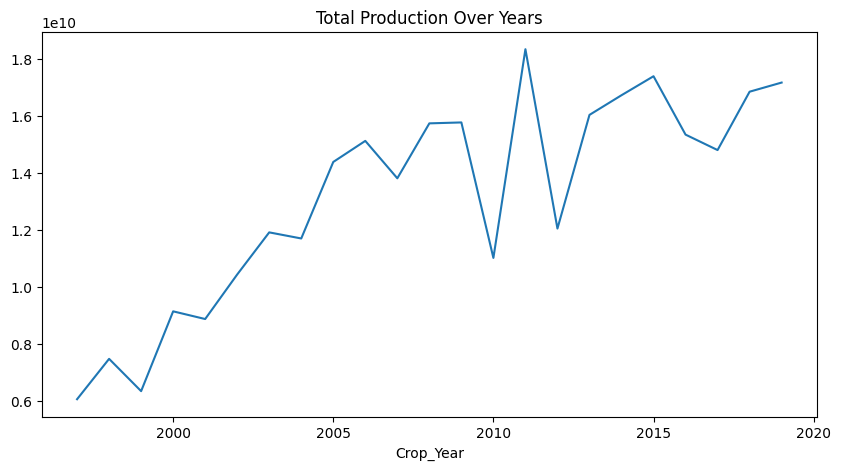

In [28]:
#Automatic Trend Analysis – Production over Years

df.groupby('Crop_Year')['Production'].sum().plot(title='Total Production Over Years', figsize=(10, 5));

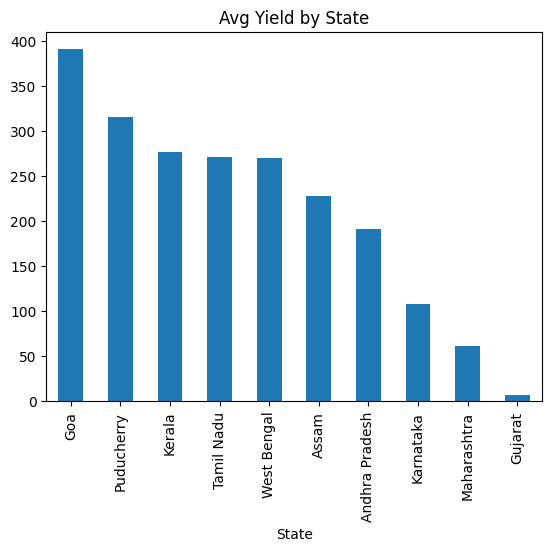

In [29]:
#Comparative Yield Between States

df.groupby('State')['Yield'].mean().sort_values(ascending=False).head(10).plot(kind='bar', title="Avg Yield by State");

In [30]:
#Crop-wise Seasonal Pattern

season_yield = df.groupby(['Crop', 'Season'])['Yield'].mean().unstack().fillna(0)
season_yield.head()

Season,Autumn,Kharif,Rabi,Summer,Whole Year,Winter
Crop,,,,,,
Arecanut,0.000000,2.249250,1.070081,0.000000,2.173196,0.000000
Arhar/Tur,0.202778,0.728325,0.571461,0.216786,1.125146,0.198929
Bajra,0.000000,1.327803,1.513881,1.445316,1.860787,0.000000
Banana,0.000000,15.189129,0.000000,0.000000,22.049006,0.000000
Barley,0.000000,0.000000,1.288575,0.000000,1.680000,0.000000


In [33]:
#Outlier Detection & Explanation

outlier_rows = df[df['Yield'] > df['Yield'].mean() + 3 * df['Yield'].std()]
outlier_rows

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1.870662e+06,6093.36,5238.051739
60,Coconut,1997,Whole Year,Kerala,884344.0,5210000000,3252.4,8.416302e+07,274146.64,5376.054286
94,Coconut,1997,Whole Year,West Bengal,24273.0,306202300,1852.9,2.310061e+06,7524.63,13003.787780
150,Coconut,1998,Whole Year,Assam,20166.0,149866000,2354.4,1.992401e+06,5848.14,6045.886957
178,Coconut,1998,Whole Year,Goa,24858.0,121000000,2964.9,2.455970e+06,7208.82,4867.650000
...,...,...,...,...,...,...,...,...,...,...
5877,Coconut,2019,Whole Year,Assam,20800.0,148629000,2084.7,3.572608e+06,7696.00,7582.287813
5944,Coconut,2019,Whole Year,Goa,26542.0,167000000,4489.5,4.558854e+06,9820.54,6359.690000
5962,Coconut,2019,Whole Year,Karnataka,610324.0,5030774000,1422.3,1.048293e+08,225819.88,8344.984000
6028,Coconut,2019,Whole Year,Kerala,760776.0,4814000000,3119.2,1.306709e+08,281487.12,5882.037143


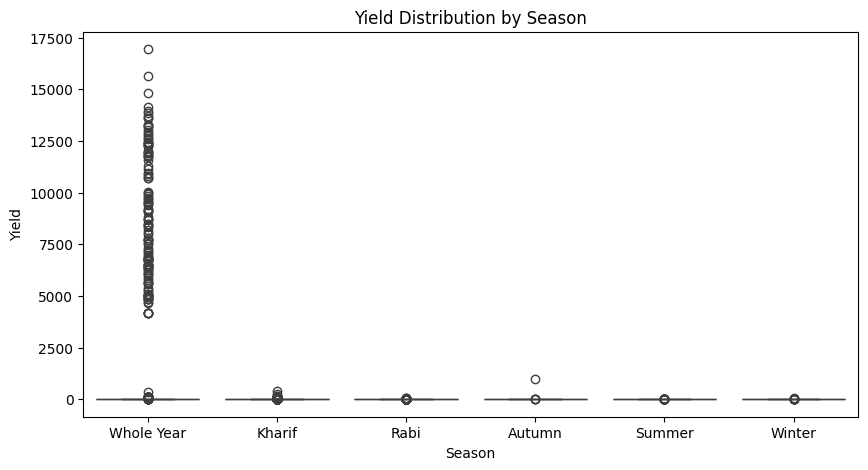

In [34]:
# Contextual Visualization With Caption

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Season', y='Yield')
plt.title("Yield Distribution by Season")
plt.show()

Predictive Content Generation :-

In [45]:
!pip install openai pandas matplotlib scikit-learn --quiet


In [47]:
import getpass
from openai import OpenAI

api_key = getpass.getpass("🔑 Enter your OpenAI API key: ")
client = OpenAI(api_key=api_key)


🔑 Enter your OpenAI API key: ··········


In [49]:
# Preprocess Data for Prediction

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



In [50]:
# Handle missing values
df = df.dropna(subset=["Area", "Production", "Yield"])


In [51]:
# Encode categorical variables
df_encoded = pd.get_dummies(df[["Crop", "State"]])
X = pd.concat([df[["Area", "Production"]], df_encoded], axis=1)
y = df["Yield"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
#Train Model for Yield Prediction

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [54]:
#Predict Yield for a New Scenario

# Step 1: Create base dictionary for new data input
new_data_input = {
    "Area": 50000,
    "Production": 300000,
    "Crop_Rice": 1,
    "State_Uttar Pradesh": 1
}

# Step 2: Initialize all columns from the original model training set
input_data = pd.DataFrame(columns=X_train.columns)
input_data.loc[0] = 0  # Set all to zero initially

# Step 3: Update the values for the required features
for key, value in new_data_input.items():
    if key in input_data.columns:
        input_data.at[0, key] = value

# Step 4: Predict
predicted_yield = model.predict(input_data)[0]
print(f" Predicted Yield: {predicted_yield:.2f} tonnes/hectare")


 Predicted Yield: 124.93 tonnes/hectare


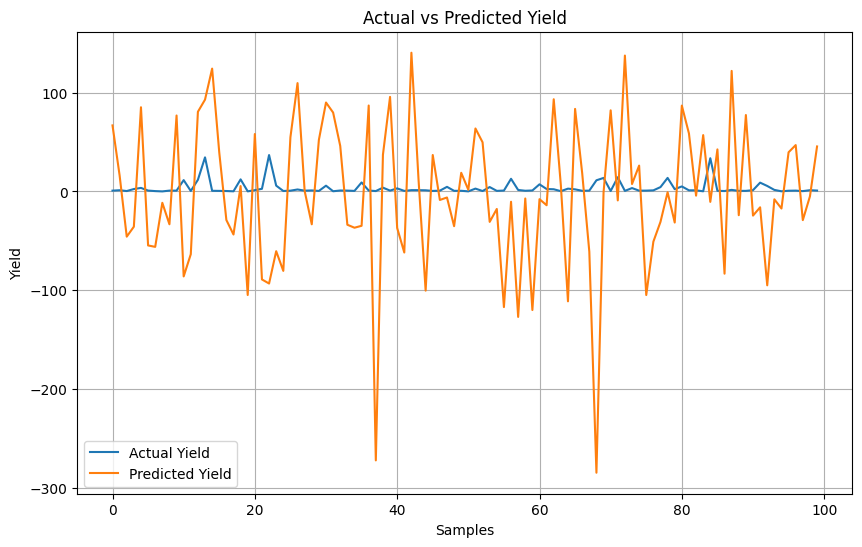

In [61]:
#Smart Chart Generation + Narration

import matplotlib.pyplot as plt

# Visualizing actual vs predicted yields
y_pred = model.predict(X_test[:100])
plt.figure(figsize=(10,6))
plt.plot(y_test[:100].values, label='Actual Yield')
plt.plot(y_pred, label='Predicted Yield')
plt.legend()
plt.title("Actual vs Predicted Yield")
plt.xlabel("Samples")
plt.ylabel("Yield")
plt.grid()
plt.show()